<a href="https://colab.research.google.com/github/Julio-CSilva/Network-Analysis/blob/main/Fluxo_de_Analise_Explorat%C3%B3ria_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

## Informações

Homo Sapiens
NCBI taxonomy id:9606

Pancreatic Cancer (PNCA) MCID: PNC035

- O Dataset é composto pela relação entre proteinas extraídas do genoma humano, O genoma humano tem cerca de 3 bilhões de pares de bases e contém cerca de 30.000 genes e que geram cerca de 400.000 proteínas.


Nodes: Proteínas


Edges: Interação entre Proteínas (método computacional por sequência)


* Filtragem


Score: 0.400 (pontuação de interação mínima exigida)


A partir dos dados com Score acima do informado, foi realizado uma extração apenas das proteinas "humanas" que fazem interação com Proteínas do cancer de pancreas.


Score (30+)
Pontuação de relevância composta MalaCards (MCRS)


Obs: 485 -> 60-70 proteínas do Cancer de Pancreas.


* Resultado:


Cerca de 100.000 relações


https://julio-csilva.github.io/Network-Analysis/network/



# Bibliotecas & Dependencias

In [ ]:
#Bibliotecas & Dependencias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import networkx as nx

!pip install pyvis
!pip install nxviz

from pyvis.network import Network

from pyvis import network as net
from IPython.core.display import display, HTML
from collections import Counter


In [ ]:
#Carregar o arquivo
link_protein_protein = pd.read_csv('https://raw.githubusercontent.com/Julio-CSilva/Network-Analysis/main/database/link_protein_vfinal.csv', delimiter=',') #92.000
protein_info = pd.read_csv('https://raw.githubusercontent.com/Julio-CSilva/Network-Analysis/main/database/details.code.protein.info.v11.5.txt', sep='\t') #20.000
colunm = ['cod_gene']
genes_pancreatic = pd.read_csv('https://raw.githubusercontent.com/Julio-CSilva/Network-Analysis/main/database/pancreatic_gen_vfinal.csv', names=colunm, header=None) #60
comunidade = pd.read_csv('https://raw.githubusercontent.com/Julio-CSilva/Network-Analysis/main/database/comunidades_vfinal.csv', delimiter=',', ) #1.600

links_edges = comunidade[['Source', 'Target']].values
nodes = set(comunidade['Source']).union(comunidade['Target'])

comunidade.head()

In [ ]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(links_edges)
pos = nx.kamada_kawai_layout(G)

# Análise Inicial

In [ ]:
len(nodes)

1172

In [ ]:
len(links_edges)

1637

## Matriz de Adjacência

In [ ]:
nx.to_pandas_adjacency(G)

,NIT2,ADSS,HTR3A,AQP4,SOCS6,CYB5R1,DLAT,GCKR,GCDH,SLC13A3,...,SLC27A5,GPLD1,GSTT2B,ALPL,SLC10A1,TARS,FCHO2,HIATL1,GPR4,PTCHD1
NIT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HTR3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AQP4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOCS6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FCHO2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HIATL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GPR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Diâmetro e Periferia da Rede

In [ ]:
nx.diameter(G)

4

In [ ]:
len(nx.periphery(G))

522

## Esparsidade

In [ ]:
#indica o nível de conectividade dentro da rede.
nx.density(G)

0.002385581006286742

In [ ]:
nx.degree_assortativity_coefficient(G)

-0.9166145607993481

Em rede desassortativa
hubs preferem se conectar a
nós de baixo grau.

## Histograma

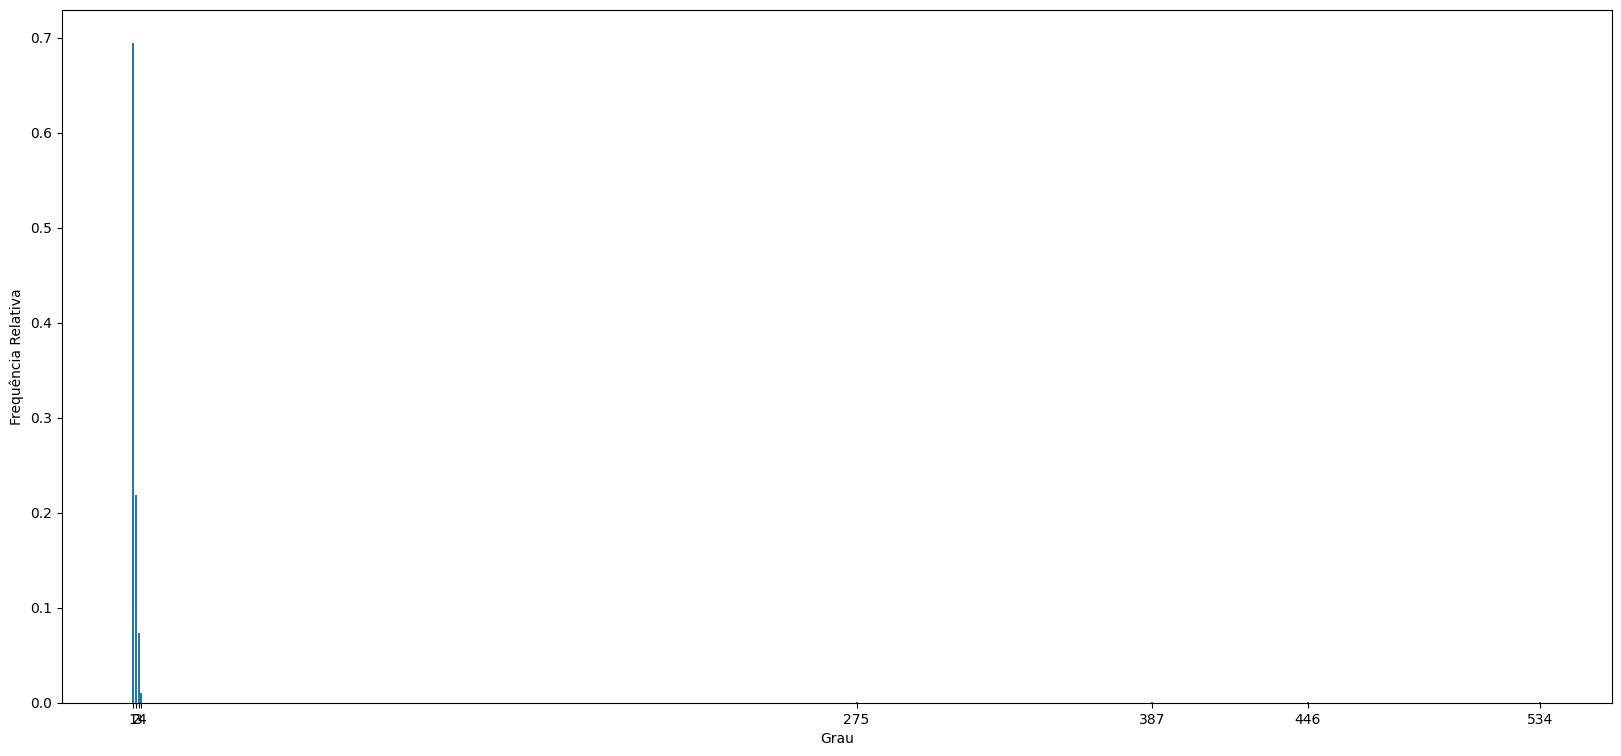

[1, 2, 3, 4, 275, 387, 446, 534]

In [ ]:
plt.figure(figsize=(20,9))
valores = dict(nx.degree(G)).values()

#quantidade de vezes que cada valor aparece
contagem = Counter(valores)

#Separar os valores e suas contagens
valores_contagens = list(contagem.items())
valores, contagens = zip(*valores_contagens)

#Calcula a frequência relativa
total = sum(contagens)
frequencias_relativas = [c / total for c in contagens]

#histograma com frequências relativas
plt.bar(valores, frequencias_relativas)

#Configura os rótulos dos eixos
plt.xlabel('Grau')
plt.ylabel('Frequência Relativa')
plt.xticks(valores)

#gráfico
plt.show()
sorted(valores)

## Coeficiente de Clustering

In [ ]:
n_p = ['SLC2A1', 'DPYD', 'HIF1A', 'SLC29A1']
nx.clustering(G, n_p)

{'SLC2A1': 0.0028417393056885173,
 'DPYD': 0.0009556534631897745,
 'HIF1A': 0.004270929563133443,
 'SLC29A1': 0.005600530856005309}

In [ ]:
nx.average_clustering(G)

0.24546103713298176

# Medidas de Centralidade

## Centralidade de Autovetor

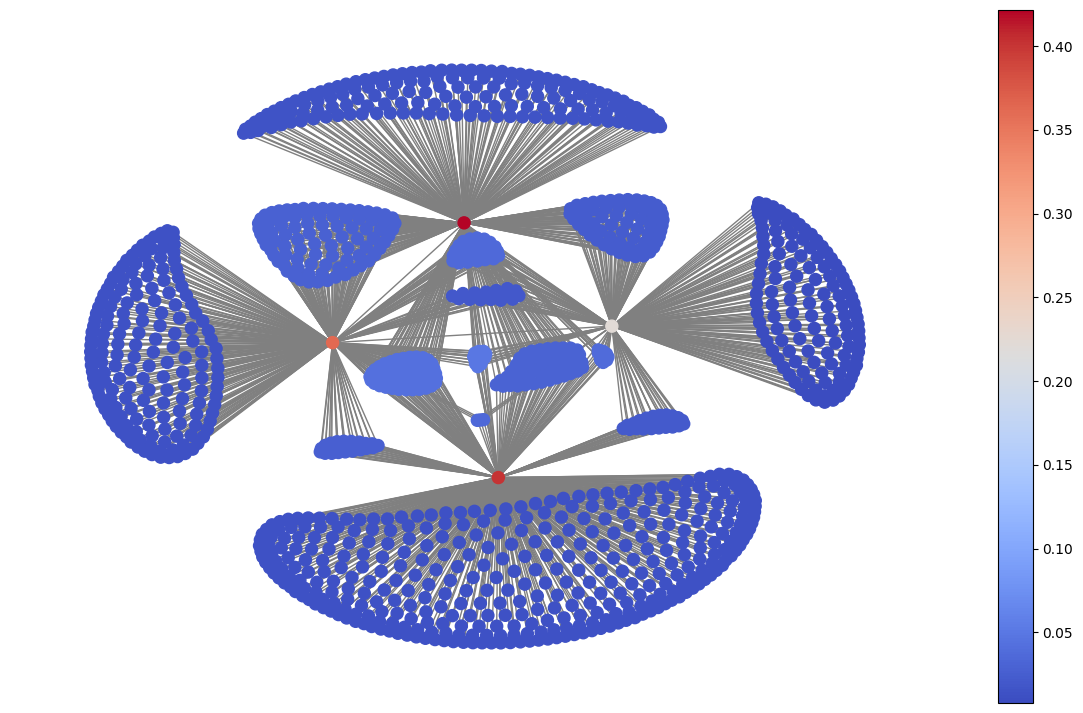

In [ ]:
plt.figure(figsize=(15,9))

#Calculando o eigenvector centrality
eigenvector = nx.eigenvector_centrality(G)

eigenvector_values = list(eigenvector.values())

#paleta de cores
cmap = plt.colormaps['coolwarm']

#Normalizar os valores do eigenvector entre 0 e 1
norm = plt.Normalize(min(eigenvector_values), max(eigenvector_values))
colors = cmap(norm(eigenvector_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca())

#Plotar o gráfico com as cores definidas
nx.draw(G, pos, with_labels=False, node_color=colors, edge_color='gray', node_shape='.')
plt.show()

In [ ]:
eigenvector = nx.eigenvector_centrality(G, weight='weight')
sorted(eigenvector.items(), key=lambda node: node[1], reverse=True)[:5]

[('SLC2A1', 0.4216118781823712),
 ('DPYD', 0.4014211291276845),
 ('HIF1A', 0.3625185733010975),
 ('SLC29A1', 0.2227092083234479),
 ('NT5E', 0.049812389215864734)]

## Grau de Centralidade

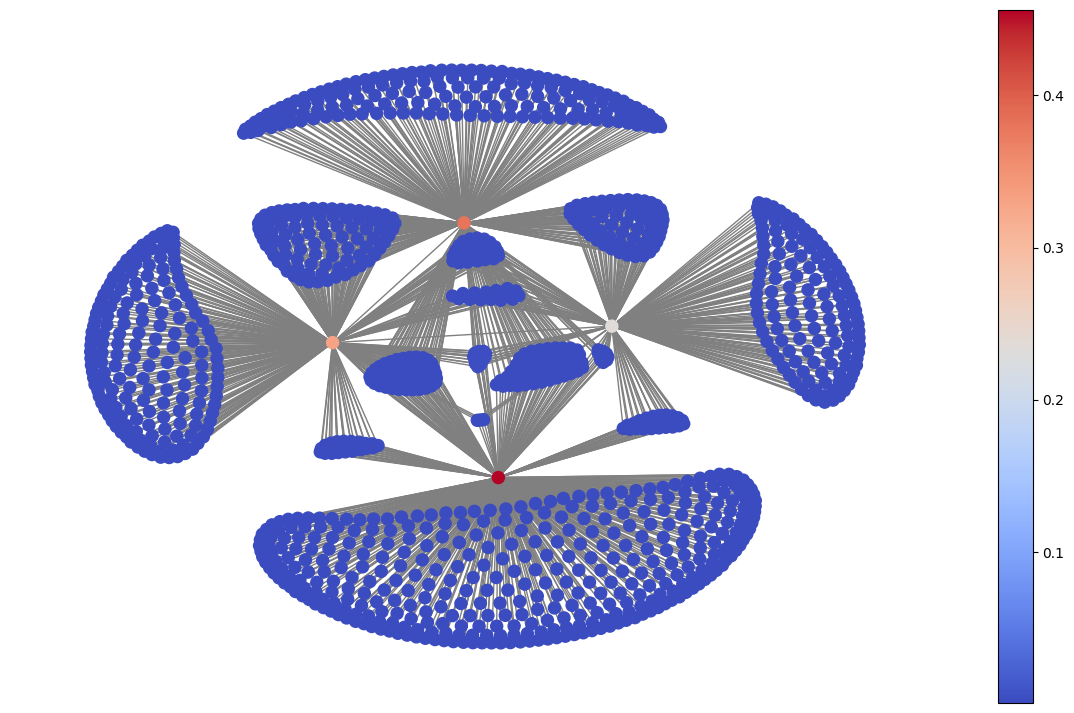

In [ ]:
plt.figure(figsize=(15,9))

#Calcular o Grau de Centralidade
degree = nx.degree_centrality(G)

degree_values = list(degree.values())

#Definir a paleta de cores
cmap = plt.colormaps['coolwarm']

#Normalizar os valores do Centralidade entre 0 e 1
norm = plt.Normalize(min(degree_values), max(degree_values))
colors = cmap(norm(degree_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca())

#Plotar o gráfico com as cores definidas
nx.draw(G, pos, with_labels=False, node_color=colors, edge_color='gray', node_shape='.')
plt.show()

In [ ]:
degree = nx.degree_centrality(G)
sorted(degree.items(), key=lambda node: node[1], reverse=True)[:10]

[('DPYD', 0.4560204953031597),
 ('SLC2A1', 0.3808710503842869),
 ('HIF1A', 0.3304867634500427),
 ('SLC29A1', 0.23484201537147736),
 ('NT5E', 0.0034158838599487617),
 ('CYP1A1', 0.0034158838599487617),
 ('HPRT1', 0.0034158838599487617),
 ('MTHFR', 0.0034158838599487617),
 ('PPIG', 0.0034158838599487617),
 ('ABCC1', 0.0034158838599487617)]

## Grau de Proximidade

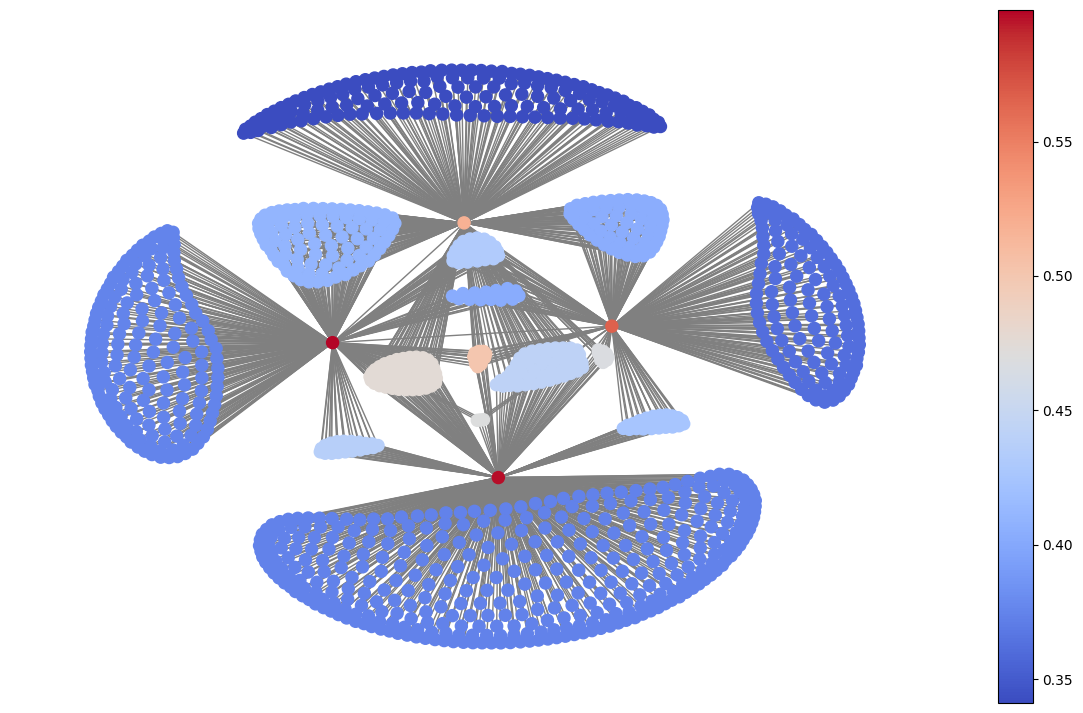

In [ ]:
plt.figure(figsize=(15,9))

#Calcular o closeness centrality
closeness = nx.closeness_centrality(G)

closeness_values = list(closeness.values())

#Definir a paleta de cores
cmap = plt.colormaps['coolwarm']

#Normalizar os valores do closeness entre 0 e 1
norm = plt.Normalize(min(closeness_values), max(closeness_values))
colors = cmap(norm(closeness_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca())

#Plotar o gráfico com as cores definidas
nx.draw(G, pos, with_labels=False, node_color=colors, edge_color='gray', node_shape='.')
plt.show()

In [ ]:
closeness = nx.closeness_centrality(G)
sorted(closeness.items(), key=lambda node: node[1], reverse=True)[:10]

[('HIF1A', 0.5989769820971867),
 ('DPYD', 0.5965359144167092),
 ('SLC29A1', 0.5665215287856797),
 ('SLC2A1', 0.517454706142289),
 ('NT5E', 0.5008554319931565),
 ('CYP1A1', 0.5008554319931565),
 ('HPRT1', 0.5008554319931565),
 ('MTHFR', 0.5008554319931565),
 ('PPIG', 0.5008554319931565),
 ('ABCC1', 0.5008554319931565)]

## Grau de intermediação

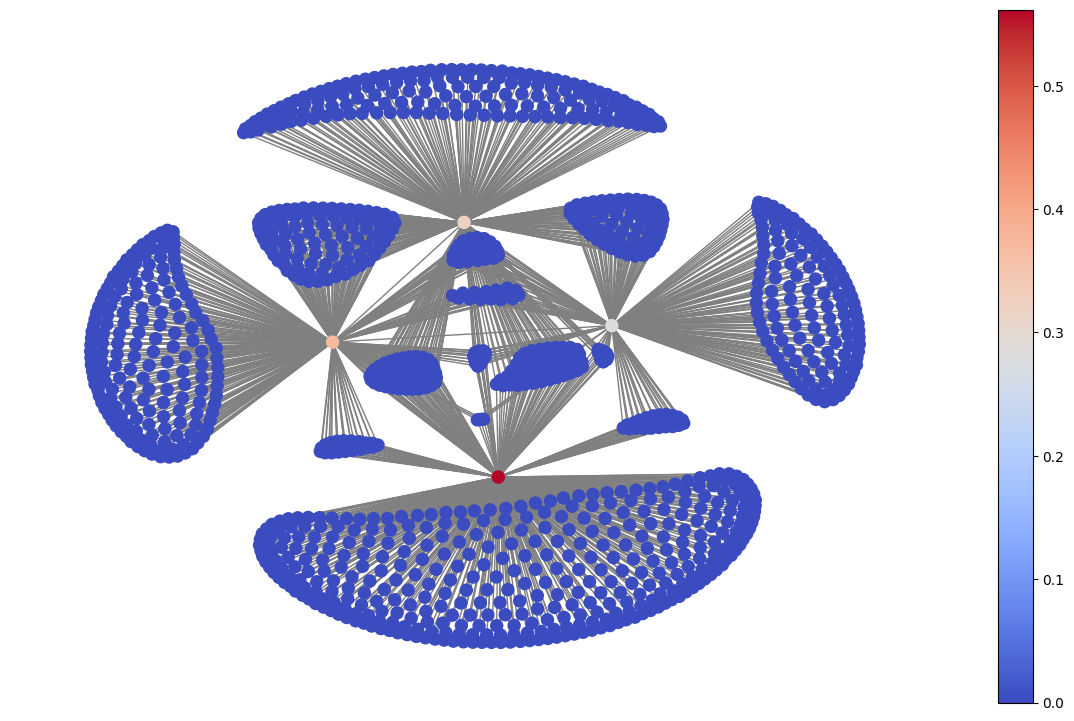

In [ ]:
plt.figure(figsize=(15,9))

#Calcular o betweenness centrality
betweenness = nx.betweenness_centrality(G)

betweenness_values = list(betweenness.values())

#Definir a paleta de cores
cmap = plt.colormaps['coolwarm']

#Normalizar os valores do betweenness entre 0 e 1
norm = plt.Normalize(min(betweenness_values), max(betweenness_values))
colors = cmap(norm(betweenness_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca())

#Plotar o gráfico com as cores definidas
nx.draw(G, pos, with_labels=False, node_color=colors, edge_color='gray', node_shape='.')
plt.show()

In [ ]:
betweenness = nx.betweenness_centrality(G)
sorted(betweenness.items(), key=lambda node: node[1], reverse=True)[:10]

[('DPYD', 0.5618459884044855),
 ('HIF1A', 0.37033849851953865),
 ('SLC2A1', 0.3204940866768365),
 ('SLC29A1', 0.2772393624656646),
 ('DLAT', 0.0007162651056758718),
 ('TSNARE1', 0.0007162651056758718),
 ('ACADL', 0.0007162651056758718),
 ('BTD', 0.0007162651056758718),
 ('HK3', 0.0007162651056758718),
 ('UCP3', 0.0007162651056758718)]

# Pyvis



In [ ]:
p_g = Network('500px', '500px',notebook=True)
p_g.add_nodes(nodes)
p_g.add_edges(links_edges)

p_g.show('rede_pyvis.html')


# Consulta de informações sobre Proteinas

In [ ]:
pd.set_option('display.max_colwidth', None)
valor_pesquisa = input("Digite o valor a ser pesquisado: ")

# Procurar pelo valor nas colunas do DataFrame
resultado = protein_info[protein_info.isin([valor_pesquisa]).any(axis=1)]
texto = resultado['annotation']
if not resultado.empty:
    print(texto)
else:
    print("Valor não encontrado no DataFrame.")

Digite o valor a ser pesquisado: HIF1A
17298    Hypoxia-inducible factor 1-alpha; Functions as a master transcriptional regulator of the adaptive response to hypoxia. Under hypoxic conditions, activates the transcription of over 40 genes, including erythropoietin, glucose transporters, glycolytic enzymes, vascular endothelial growth factor, HILPDA, and other genes whose protein products increase oxygen delivery or facilitate metabolic adaptation to hypoxia. Plays an essential role in embryonic vascularization, tumor angiogenesis and pathophysiology of ischemic disease. Binds to core DNA sequence 5'-[AG]CGTG-3' within the hypoxia res [...] 
Name: annotation, dtype: object


## Consultas

DPYD: Envolvido na degradação da base de pirimidina. Catalisa a redução de uracilo e timina. Também envolveu a degradação do quimioterápico 5-fluorouracil; Pertence à família das di-hidropirimidinas desidrogenases.

SLC2A1: Família 2 de transportadores de solutos, membro 1 de transporte facilitado de glicose; Transportador facilitador de glicose. Esta isoforma pode ser responsável pela captação de glicose constitutiva ou basal. Tem uma especificidade de substrato muito ampla; pode transportar uma ampla variedade de aldoses, incluindo pentoses e hexoses; Pertence à superfamília de grandes facilitadores. Família de transportadores de açúcar (TC 2.A.1.1). Subfamília do transportador de glicose.

HIF1A: Fator 1-alfa induzível por hipóxia; Funciona como um regulador mestre da transcrição da resposta adaptativa à hipóxia. Sob condições hipóxicas, ativa a transcrição de mais de 40 genes, incluindo eritropoetina, transportadores de glicose, enzimas glicolíticas, fator de crescimento endotelial vascular, HILPDA e outros genes cujos produtos proteicos aumentam a oferta de oxigênio ou facilitam a adaptação metabólica à hipóxia. Desempenha um papel essencial na vascularização embrionária, angiogênese tumoral e fisiopatologia da doença isquêmica. Liga-se à sequência central de DNA 5'-[AG]CGTG-3' dentro da área de hipóxia.